<a href="https://colab.research.google.com/github/saumyadash9/Saumya-Dash-Rossmann-Sales-Prediction---Capstone-Project.ipynb/blob/main/Saumya_Dash_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **Importing required libraries and data files**

In [101]:
#import required libraries
#Modules for dataframe and ndarrays and maths
import numpy as np
import pandas as pd
from datetime import datetime
import math
#Vizualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
#Importing Libraries for Modelling
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
lin= LinearRegression()
import warnings    
warnings.filterwarnings('ignore')

In [102]:
#Mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
# Read csv file
df_sales = pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/Copy of store.csv')

# **Data Exploration**

In [104]:
# checking top 5 rows of the sales dataset
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [105]:
# checking top 5 rows of the stores dataset
df_stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [106]:
# checking shape of sales dataset
df_sales.shape

(1017209, 9)

In [107]:
# checking shape of stores dataset
df_stores.shape

(1115, 10)

In [108]:
#We can see that the number of rows in both dataset differs significantly. 
#We only have data for 1115 stores in the stores dataset, which is only 0.1%, of the total number of sales data given in the sales dataset

1115/1017209*100

0.10961365855001283

In [109]:
#checking for null values and the data types of all the columns in sales dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


*   We can see there are no Null Values in the sales dataset




In [110]:
#checking for null values and the data types of all the columns in stores dataset.
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [111]:
#counting the number of null values in each column in stores dataset
df_stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Observation**

There are four columns which contains null values those are following:


*  **CompetitionDistance-** This is the distance from the nearest competitor store.We will check the distribution of the data according to which we will determine which among mean, median or mode will be suitable to replace the null value with.
*   **CompetitionOpenSinceMonth-** gives the around which the nearest competitor was opened, mode of the column would tell us the most occuring month

* **CompetitionOpenSinceYear- **bold text** **gives the year around which the nearest competitor was opened, mode of the column would tell us the most occuring month

* **Promo2SinceWeek, Promo2SinceYear and PromoInterval** -are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.


# **Data Cleaning**

 **Treating the Null Values**

In [112]:
#checking for unique values in CompetitionOpenSinceYear
df_stores.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [113]:
#checking for unique values in CompetitionOpenSinceMonth
df_stores.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [114]:
#counting for competition stores being open for each month 
df_stores.CompetitionOpenSinceMonth.value_counts() 

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [115]:
#counting for competition stores being open for each year 
df_stores.CompetitionOpenSinceYear.value_counts() 

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

In [116]:
#checking the percentage of missing values in both Competition Open since Month and Year
354/1115*100

31.748878923766817

In [117]:
#filling null values in Promo2 Since week, year and Promo Interval with 0
df_stores['Promo2SinceWeek'] = df_stores['Promo2SinceWeek'].fillna(0)

In [118]:
df_stores.Promo2SinceWeek.isnull().sum()

0

In [119]:
df_stores['Promo2SinceYear'] = df_stores['Promo2SinceYear'].fillna(0)

In [120]:
df_stores['PromoInterval'] = df_stores['PromoInterval'].fillna(0)

In [121]:
df_stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [122]:
df_stores['PromoInterval'] = df_stores['PromoInterval'].fillna(0)

In [123]:
#filling the null values with median for CompetitionDistance column and mode for CompetitionOpenSince Year and Month
df_stores["CompetitionDistance"].fillna(df_stores["CompetitionDistance"].median(),inplace=True)
df_stores["CompetitionOpenSinceMonth"].fillna(df_stores["CompetitionOpenSinceMonth"].mode()[0],inplace=True)
df_stores["CompetitionOpenSinceYear"].fillna(df_stores["CompetitionOpenSinceYear"].mode()[0],inplace=True)

In [124]:
df_stores = df_stores.dropna(how='all', axis=1)

In [125]:
#Let's merge the two dataset to proceed with our prediction process 
new_dataset = pd.merge(df_sales,df_stores, how = 'left', on = 'Store')

In [126]:
#checking for nullvalues in the new dataset 
new_dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [127]:
#checking additional information such as null values and data types of the columns in the new dataset
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [128]:
# looking for some statistical description of our main dataset using describe function
new_dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


 **Data Manipulation**

In [129]:
# eliminating the rows where the stores are closed, i.e. rows with Open ==0, as they are not relevant to predict sales.
new_dataset = new_dataset[new_dataset.Open == 1]

In [130]:
#Since we have removed all the rows with Open == 0, we are only left with rows where stores are Open.
# Hence dropping the Open Column from our dataset
new_dataset.drop("Open",axis=1, inplace= True)

In [131]:
# checking for rows with zero sales 
new_dataset["Store"][new_dataset["Sales"]==0].sum()

31460

In [132]:
# calculating the percentage of rows with zero sales in our dataset
round((new_dataset["Store"][new_dataset["Sales"]==0].sum()/new_dataset["Store"].sum()*100) ,4)

0.0067

In [133]:
# We can see that there are only 0.0067% data with zero sales so eliminating those instances from our datatset.
new_dataset = new_dataset[new_dataset.Sales!=0]

In [134]:
#checking for information of our dataset
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   StoreType                  844338 non-null  object 
 9   Assortment                 844338 non-null  object 
 10  CompetitionDistance        844338 non-null  float64
 11  CompetitionOpenSinceMonth  844338 non-null  float64
 12  CompetitionOpenSinceYear   844338 non-null  float64
 13  Promo2                     8

In [135]:
# adding a weekend column in our dataset with 0,1 values if weekend or weekdays respectively
Weekend = []
for row in new_dataset['DayOfWeek']:
    if row < 6 :    Weekend.append(0)        
      
    else:           Weekend.append(1)

In [136]:
#adding the weekend column in our dataset
new_dataset['Weekend'] = pd.Series(Weekend)

In [137]:
#checking top 5 rows of dataset
new_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0.0
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0.0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0.0


In [138]:
# making a list for all the continuous independent variables 
continuous_variable_list = ["Customers","CompetitionDistance"]

In [139]:
# making a list for all the categorical independent variables 
categorical_variable_list = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [140]:
#defining a function to extract date, month and year from date column
def extract_year(x):
    return int(str(x)[:4])

def extract_month(x):
    return int(str(x)[5:7])

def extract_month_year(x):
    return (str(x)[:7])

In [141]:
#adding date, month and year columns ith respected extracted values in dataset
new_dataset['Date'] = new_dataset['Date'].apply(extract_month_year)
df_sales['Date'] = df_sales['Date'].apply(extract_month_year)
new_dataset['Year']  = new_dataset['Date'].apply(extract_year)
new_dataset['Month'] = new_dataset['Date'].apply(extract_month)
df_sales['Year']  = df_sales['Date'].apply(extract_year)
df_sales['Month'] = df_sales['Date'].apply(extract_month)

In [142]:
# checking all the unique values for catergorical independent variables
for i in categorical_variable_list:
  print(f'Unique values of {i} column are {new_dataset[i].unique()} ')
  print("\n")

Unique values of DayOfWeek column are [5 4 3 2 1 7 6] 


Unique values of Promo column are [1 0] 


Unique values of StateHoliday column are ['0' 'a' 'b' 'c' 0] 


Unique values of SchoolHoliday column are [1 0] 


Unique values of StoreType column are ['c' 'a' 'd' 'b'] 


Unique values of Assortment column are ['a' 'c' 'b'] 


Unique values of CompetitionOpenSinceMonth column are [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.] 


Unique values of CompetitionOpenSinceYear column are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 


Unique values of Promo2 column are [0 1] 


Unique values of Promo2SinceWeek column are [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] 


Unique values of Promo2SinceYear column are [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.] 


Unique values of PromoInterval column are [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug

We can observe :

*   We can see there are two Zeros in StateHoliday out of which one is text so we need to combine them to be one.

In [143]:
# replacing text "0" with 0
new_dataset["StateHoliday"] = new_dataset["StateHoliday"].map({0: 0, "0": 0, "a":"a" , "b": "b", "c":"c"})

In [144]:
#Counting stores present in each Store Types
new_dataset.StoreType.value_counts()

a    457042
d    258768
c    112968
b     15560
Name: StoreType, dtype: int64

In [145]:
#Adding a column for average sales for each storetype in the dataset
Average_Storewise_sales = new_dataset.groupby('StoreType')['Store'].mean()

In [146]:
# printing the average sales for each storetype
print(Average_Storewise_sales)

StoreType
a    560.087410
b    555.930077
c    608.222337
d    533.887432
Name: Store, dtype: float64


In [147]:
# x = ['Store','DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceYear','Sales']

# **Data Vizualization**

### **Univariate Analysis**

*** Data Vizualization for Continuous Variables***

In [148]:
# Plotting distribution plot for each continuous variables : Customers,Sales and Competition Distance

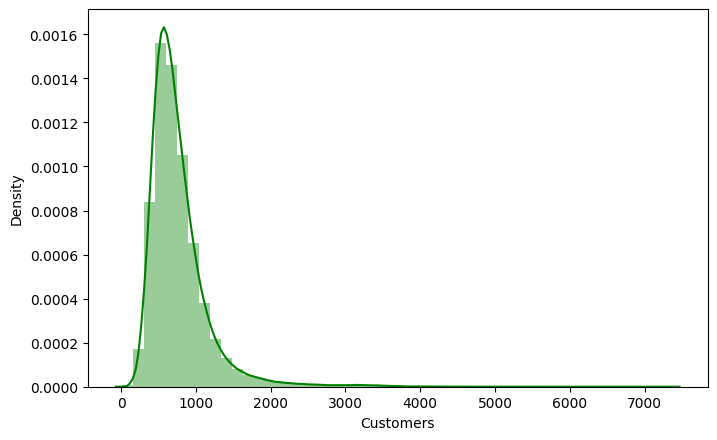

In [149]:
sns.distplot(new_dataset['Customers'], color="green")
plt.show()

*From the above probability density plot we can see that the 'Customers' is not normally distributed, it's a bit right skewed.To treat the skweness we are using Square root transformation for the particular variable.*

In [150]:
new_dataset["sqrt_Customers"] = np.sqrt(new_dataset["Customers"])

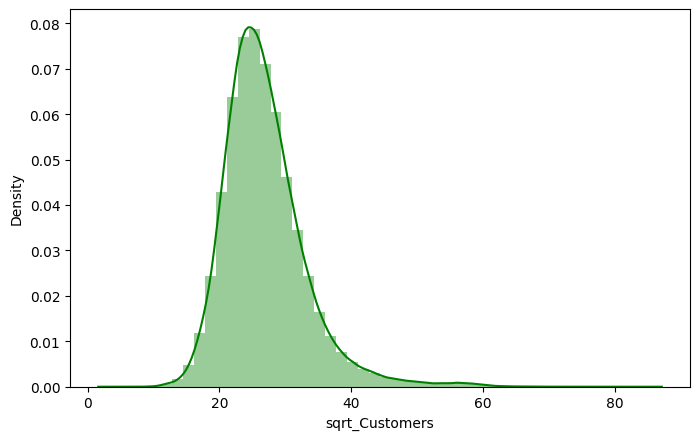

In [151]:
sns.distplot(new_dataset['sqrt_Customers'], color="green")
plt.show()

Now the distribution looks better than earlier.

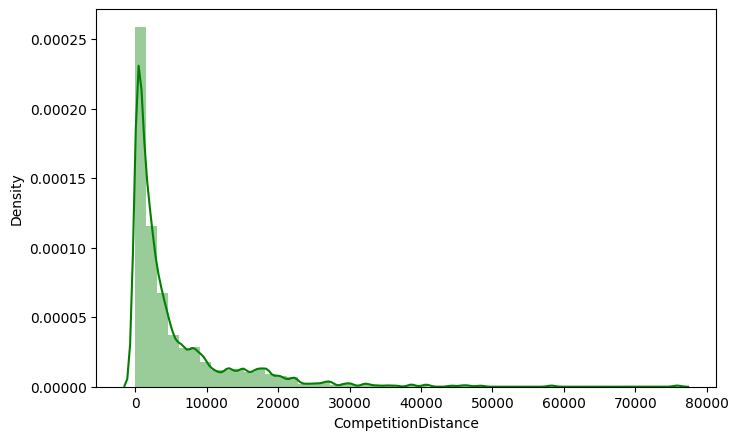

In [152]:
sns.distplot(new_dataset['CompetitionDistance'], color="green")
plt.show()

In [153]:
new_dataset["log_CompetitionDistance"] = np.log(new_dataset["CompetitionDistance"])

*From the above probability density plot we can see that the 'Competition Distance' is not normally distributed, it's moderately right skewed.To treat the skweness we are using Log transformation for the particular variable.*

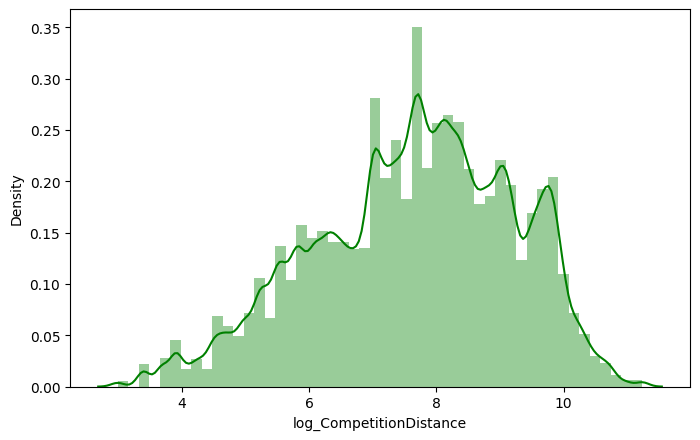

In [154]:
sns.distplot(new_dataset["log_CompetitionDistance"], color="green")
plt.show()

Now the distribution looks better than earlier.

*Checking the distribution of the Target Variable:Sales using distplot*

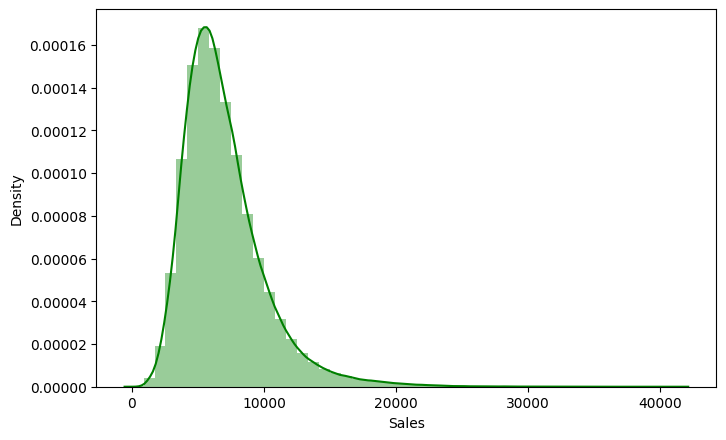

In [155]:
sns.distplot(new_dataset['Sales'], color="green")
plt.show()

* *From the above probability density plot we can see that the targe 'Sales' is not normally distributed, it's a bit rightly skewed.To treat the skweness we are using Square root transformation for the particular variable.*

In [156]:
new_dataset["sqrt_Sales"] = np.sqrt(new_dataset["Sales"])

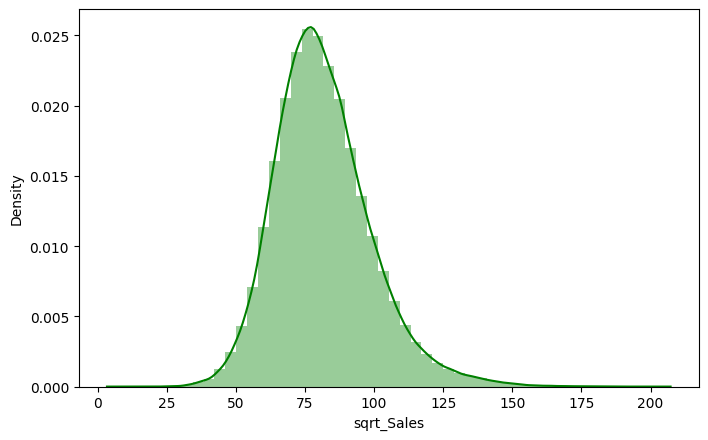

In [157]:
sns.distplot(new_dataset['sqrt_Sales'], color="green")
plt.show()

*We can See Square Root Transformation did a great job! Our Target Variable is normally distributed and is ready to be used in our Model.*

### **Data Visualization for Categorical Independent Variables**

In [158]:
#creating a dataframe out of the categorical variable list constructed above
cat_df = new_dataset[categorical_variable_list]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff414631fa0>,
      dtype=object)

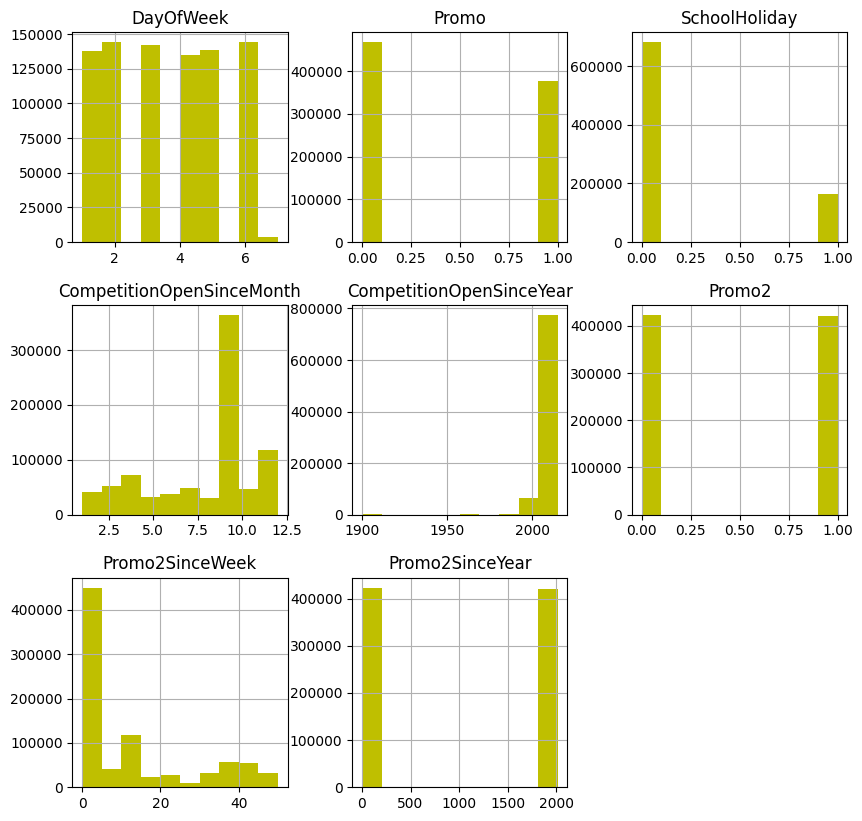

In [159]:
# Univariate analysis of Categorical Variables in the dataset using Histograms.
cat_df.hist(color = 'y', figsize= (10,10))

### **Bivariate Analysis**

Store Type and Sales

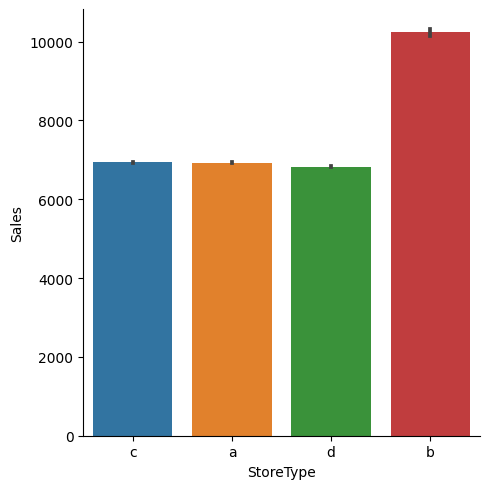

In [160]:
# Plotting the sales for each Store Type using categorical barplot
sns.catplot(data=new_dataset, x="StoreType", y="Sales", kind="bar")

Customers and Sales

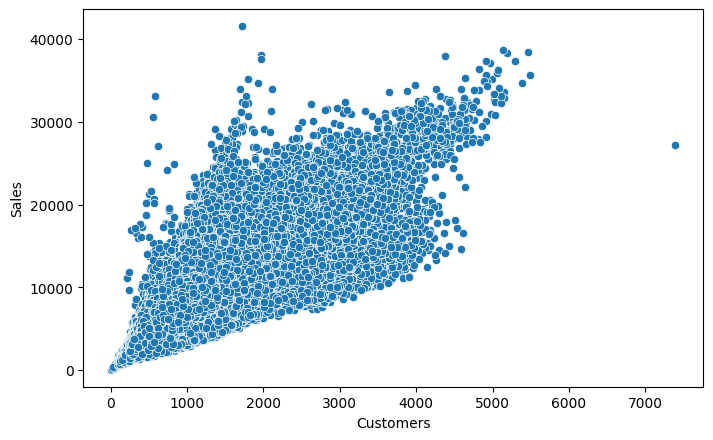

In [161]:
# Plotting the relationship between Sales and Number of Customers using Scatterplot
sns.scatterplot(x=new_dataset['Customers'], y=new_dataset['Sales'])

Since we have applied sqrt transformations in Sales and Customers we have to check the scatterplot again.

Sqrt_Sales vs Sqrt_Customers

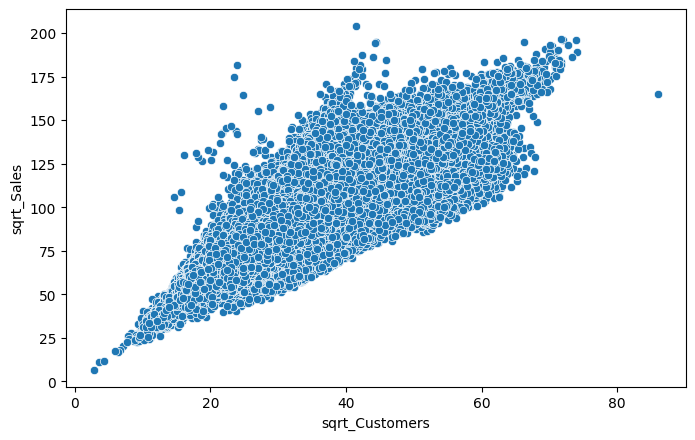

In [162]:
# scatterplot for sqrt_customers vs sqrt_sales
sns.scatterplot(x=new_dataset['sqrt_Customers'], y=new_dataset['sqrt_Sales'])

Competition Distance and Sales

**Observation:** sqrt_Sales and sqrt_Customer scatter plot shows a direct positive relation between them with a few outliers

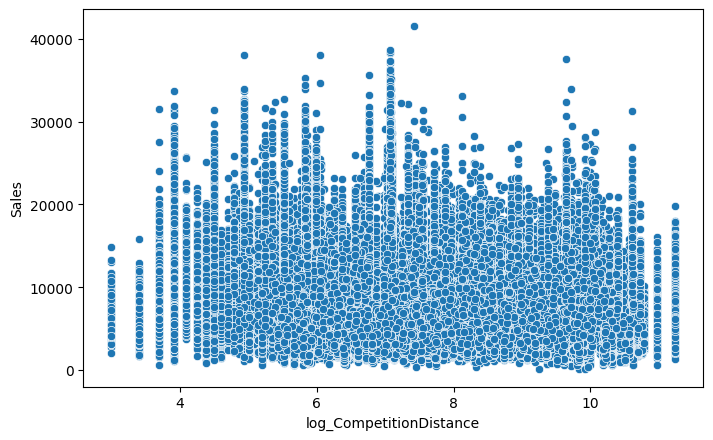

In [163]:
# Plotting the relationship between Sales and Competition Distance using Scatterplot
sns.scatterplot(x=new_dataset['log_CompetitionDistance'], y=new_dataset['Sales'])

Sales vs Log_competitionDistance

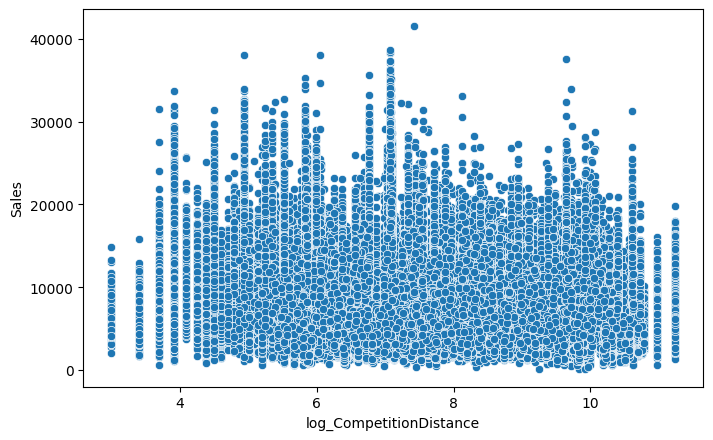

In [164]:
# scatterplot for log_CompetitionDistance vs sales
sns.scatterplot(x=new_dataset['log_CompetitionDistance'], y=new_dataset['Sales'])

**Observation:** From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

Date and Sales: Monthly Sales

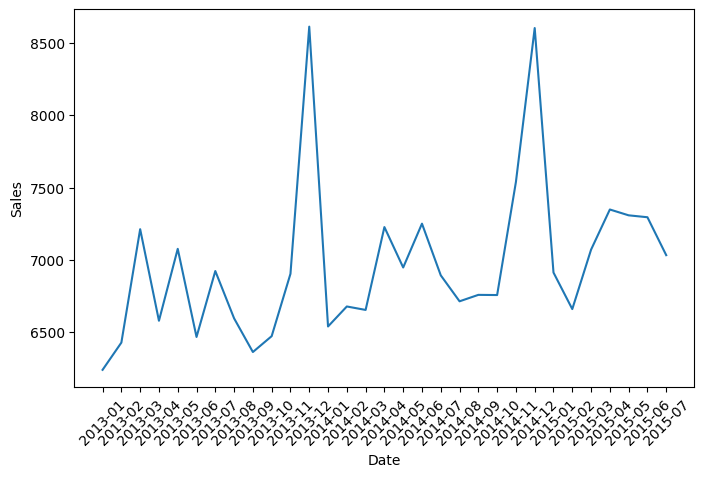

<Figure size 1000x1000 with 0 Axes>

In [165]:
#Monthly trend of sales using lineplot
sns.lineplot(data=new_dataset.groupby('Date')['Sales'].mean().reset_index(), x='Date', y='Sales')
plt.xticks(rotation= 45)
plt.figure(figsize=(10,10))
plt.show()

**Observation:** Clearly evident that october 2013 and october 2014 has the maximum sales. That means october is the best month in terms of sales.

State Holiday and Sales

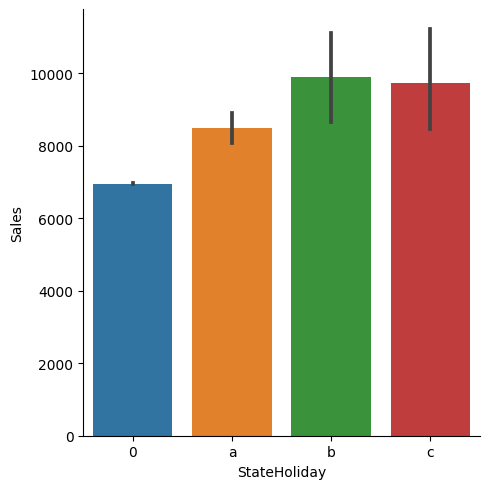

In [166]:
# Plotting categorical bar plot for count of Sales on each State Holidays
sns.catplot(data=new_dataset, x="StateHoliday", y="Sales", kind="bar")

School Holiday and Sales

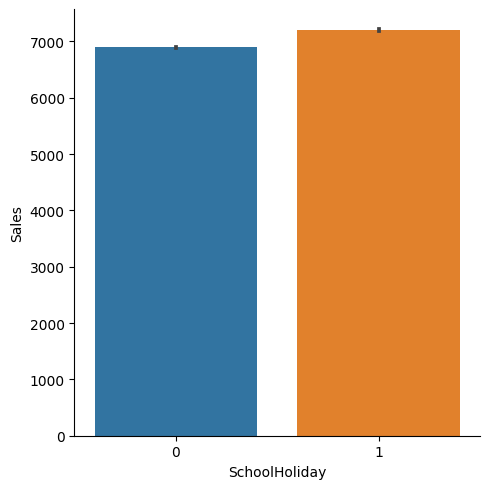

In [167]:
# Plotting categorical bar plot for count of Sales in each School Holiday
sns.catplot(data=new_dataset, x="SchoolHoliday", y="Sales", kind="bar")

Competition Open Since Year and Sales

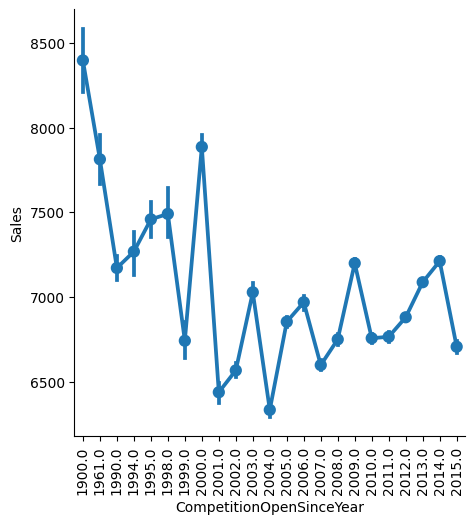

In [168]:
#plotting line graph for showing trend in sales due to Competition open since year
sns.catplot(data=new_dataset, x="CompetitionOpenSinceYear", y="Sales", kind="point")
plt.xticks(rotation= 90)
plt.show()

In [169]:
#adding a column average customer sales by dividing Sales with Customers
new_dataset["Avg_Customer_Sales"] = new_dataset.Sales / new_dataset.Customers

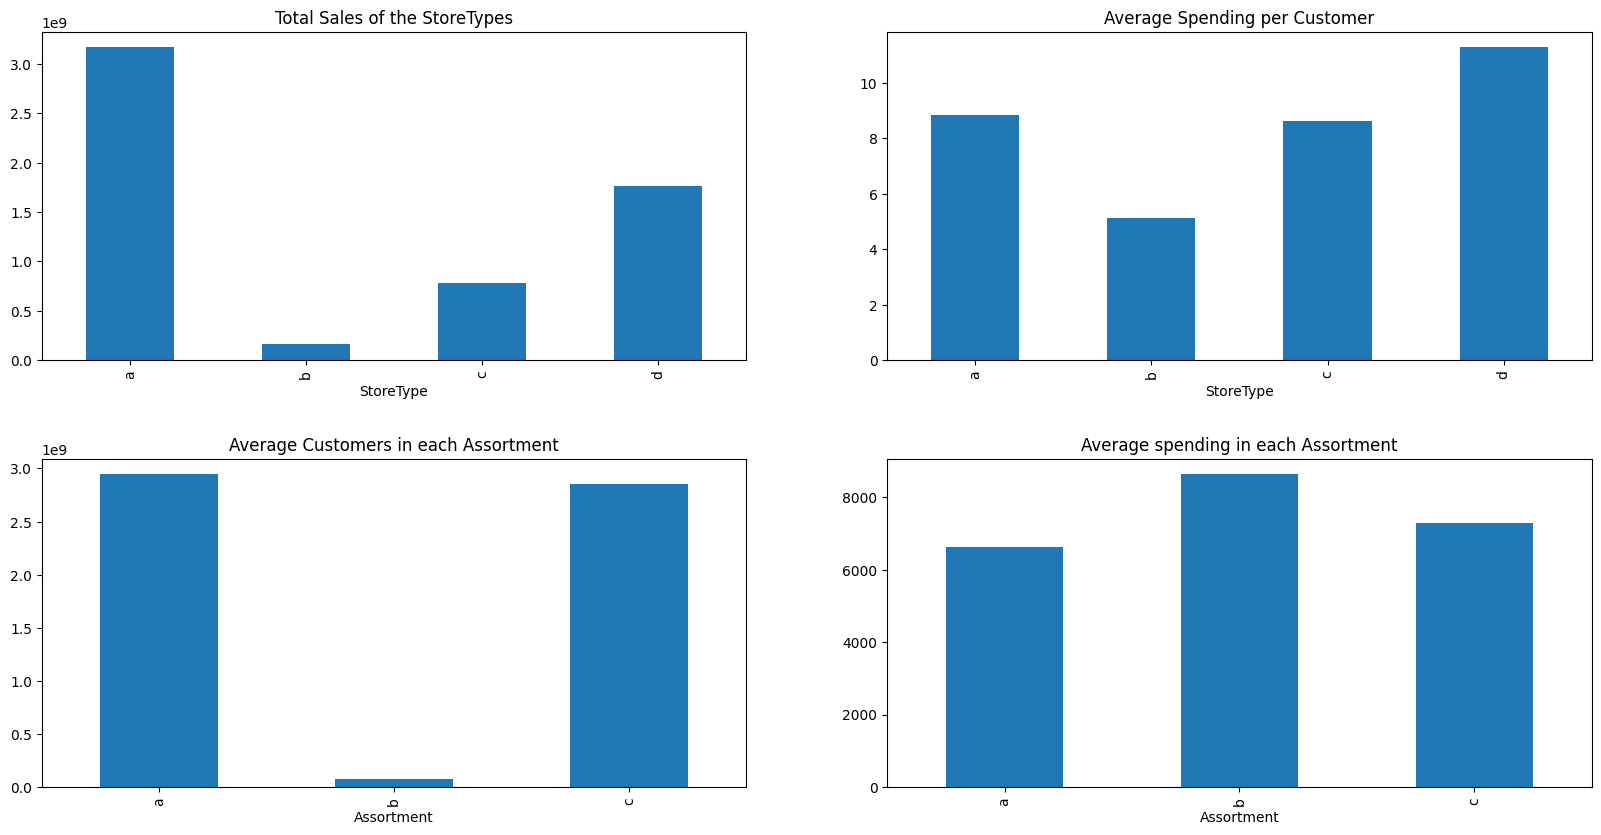

In [170]:
#plotting Histograms showing Total Sales of Store Types, Average Spending per Customer, Average Customer per Store Type and Average sales of Store Types using the mentioned formulae
f, ax = plt.subplots(2, 2, figsize = (20,10))

new_dataset.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,0], title = "Total Sales of the StoreTypes")
new_dataset.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[0,1], title = "Average Spending per Customer")
new_dataset.groupby("Assortment")["Sales"].sum().plot(kind = "bar", ax = ax[1,0], title = "Average Customers in each Assortment")
new_dataset.groupby("Assortment")["Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average spending in each Assortment")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**Observation:**

* Store a has maximum customers.

* Store d has maximum average spendings per customers.

* Assortment a and c has maximum customers.

* In terms of average spending per customers assortment b has maximum footfalls.

Promo and Promo2 with Sales

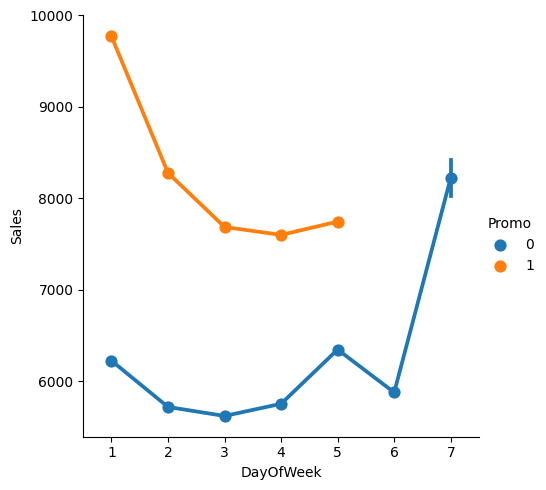

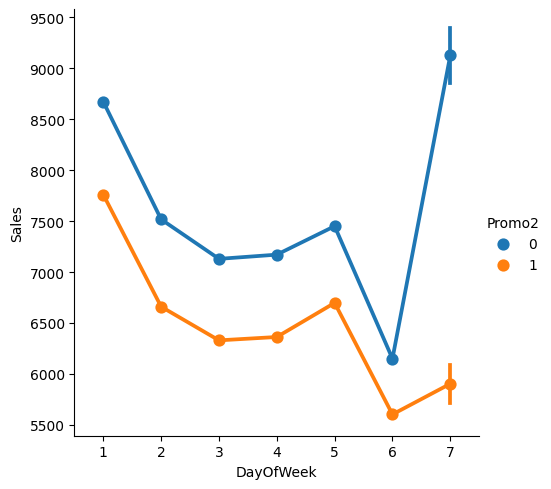

In [171]:
#plotting day wise sales with and without promo using factorplot
sns.factorplot(data =new_dataset, x = "DayOfWeek", y = "Sales", hue = "Promo")
sns.factorplot(data = new_dataset, x = "DayOfWeek", y = "Sales", hue = "Promo2")

**Observation:** So, no promotion in the weekend. However, the sales are very high. If promo offers are to be given on weekends definitely the sales are going to skyrocket.

Store Type Assortment level with Sales

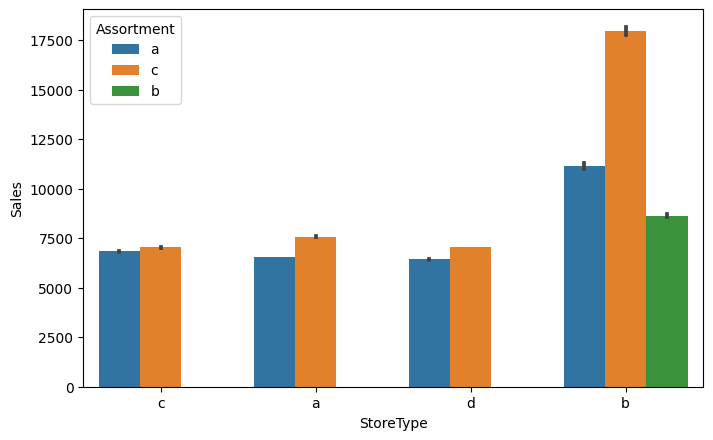

In [172]:
#Plotting sales and assortment level for each store type using barplot
sns.barplot(x=new_dataset["StoreType"],y=new_dataset['Sales'],hue=new_dataset["Assortment"])

**Observation:**The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores

State Holiday and Average sales

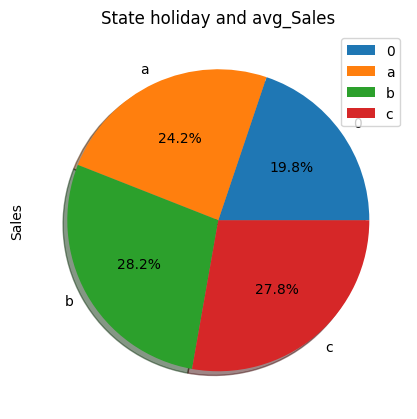

In [173]:
#Plotting percentage of Average sales in each state holiday using pie chart
new_dataset.groupby("StateHoliday")["Sales"].mean().plot.pie(title='State holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

School Holiday and Average Sales

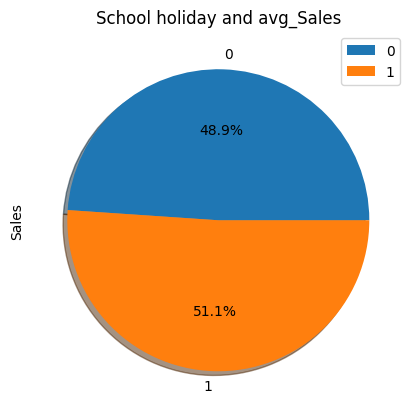

In [174]:
#Plotting percentage of Average sales in each School Holiday using pie chart
new_dataset.groupby("SchoolHoliday")["Sales"].mean().plot.pie(title='School holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**Observation:** Clearly evident that on holiday average sales are better as compared to non holiday.

# **Feature Engineering**

In [175]:
#checking top 5 rows of the dataset to proceed with feature engineering
new_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend,Year,Month,sqrt_Customers,log_CompetitionDistance,sqrt_Sales,Avg_Customer_Sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0.0,0.0,0,0.0,2015,7,23.558438,7.146772,72.546537,9.482883
1,2,5,2015-07,6064,625,1,0,1,a,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0,2015,7,25.000000,6.345636,77.871689,9.702400
2,3,5,2015-07,8314,821,1,0,1,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",0.0,2015,7,28.653098,9.556055,91.181138,10.126675
3,4,5,2015-07,13995,1498,1,0,1,c,c,...,0.0,0.0,0,0.0,2015,7,38.704005,6.429719,118.300465,9.342457
4,5,5,2015-07,4822,559,1,0,1,a,a,...,0.0,0.0,0,0.0,2015,7,23.643181,10.305948,69.440622,8.626118


In [176]:
#mapping holiday with 1 and non holiday with 0
new_dataset["StateHoliday"] =new_dataset["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

Since any kind of holiday can be a good ocassion for customers to go shopping.
 
Assumption :-- Sales may not individually depend on the specific type of holiday. 

**Checking and Treating Multicollinearity**

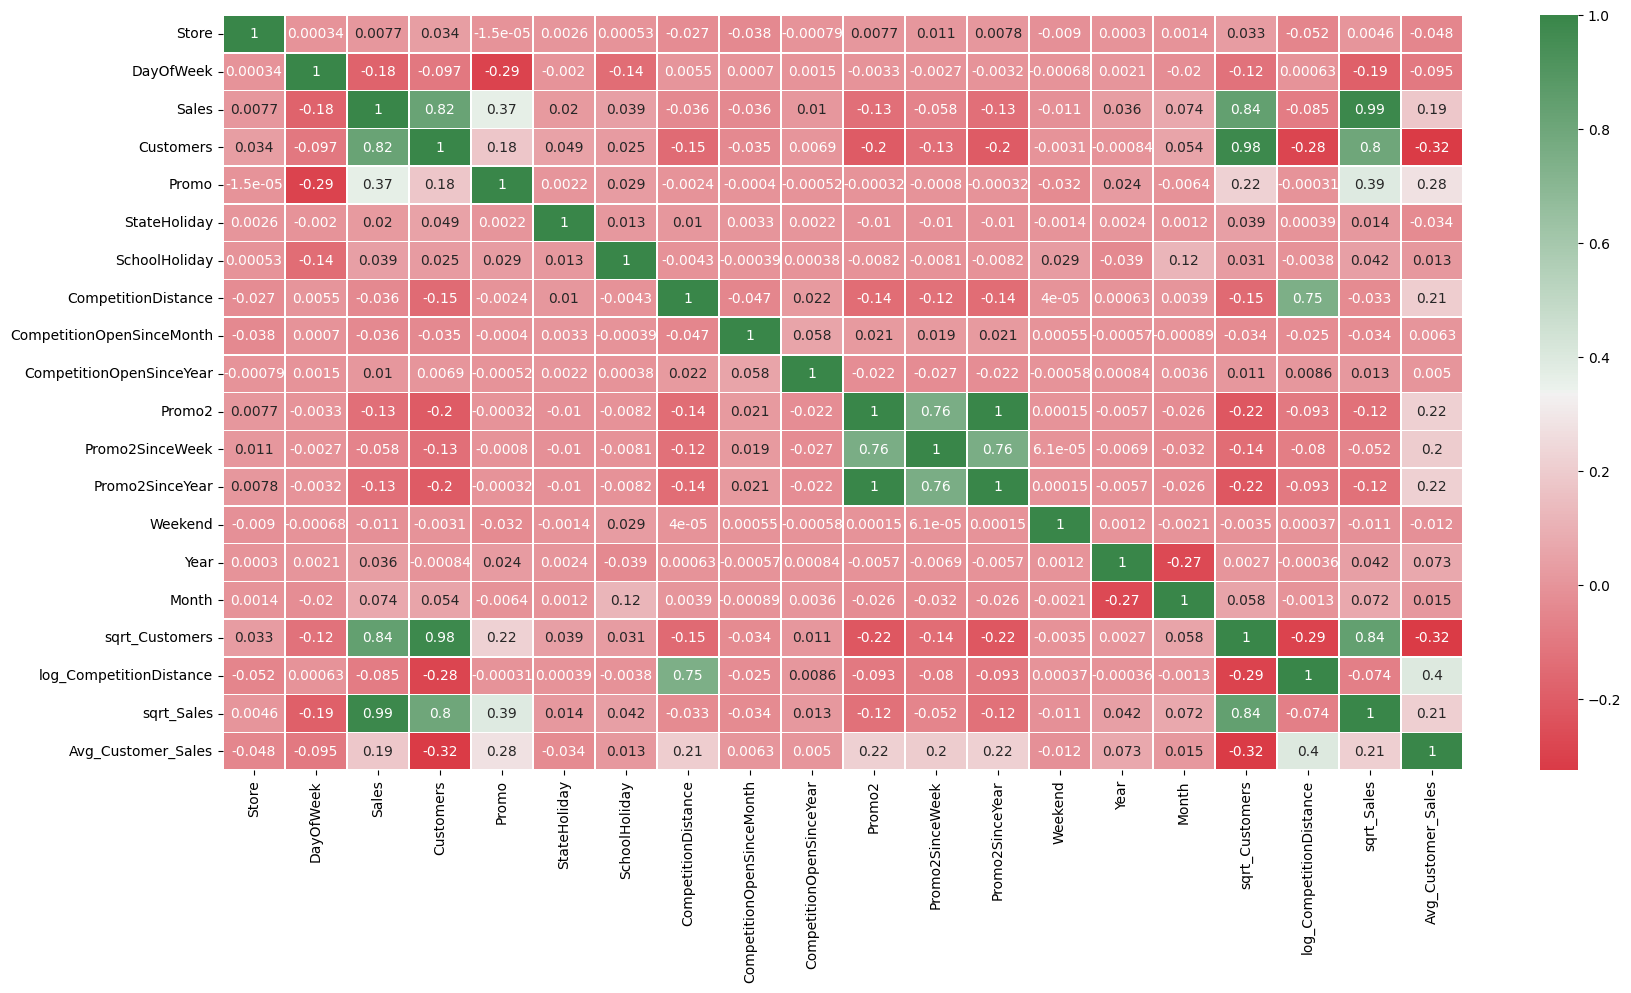

In [177]:
#Checking correlation matrix of the whole dataset using Correlation Heatmap
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(new_dataset.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

Observations from the matrix:

*  Promo2 is highly correlated with promo2sinceYear and promo2sinceWeek

Let's verify multicollinearity by applying VIF algorithm

In [178]:
#importing relevant library
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [179]:
# Calculating VIF for all the columns
calc_vif(new_dataset[[i for i in new_dataset.describe().columns if i not in ['Store','Sales','Weekend','sqrt_Sales']]])

,variables,VIF
0,DayOfWeek,5.812913e+00
1,Customers,1.192055e+02
2,Promo,2.413168e+00
3,StateHoliday,1.006873e+00
4,SchoolHoliday,1.282829e+00
5,CompetitionDistance,3.530494e+00
6,CompetitionOpenSinceMonth,8.940055e+00
7,CompetitionOpenSinceYear,1.404267e+05
8,Promo2,1.578139e+06
9,Promo2SinceWeek,3.989381e+00


In [180]:
# One hot encoding for Categorical features required for modelling
new_dataset= pd.get_dummies(new_dataset,columns=['StoreType','Assortment','Year'])

In [181]:
new_dataset.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Year_2013,Year_2014,Year_2015
0,1,5,2015-07,5263,555,1,0,1,1270.0,9.0,...,0,0,1,0,1,0,0,0,0,1


In [182]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  int64  
 7   SchoolHoliday              844338 non-null  int64  
 8   CompetitionDistance        844338 non-null  float64
 9   CompetitionOpenSinceMonth  844338 non-null  float64
 10  CompetitionOpenSinceYear   844338 non-null  float64
 11  Promo2                     844338 non-null  int64  
 12  Promo2SinceWeek            844338 non-null  float64
 13  Promo2SinceYear            8

# **Linear Regression**


In [183]:
# Determing independent and dependent variable best suited for modelling 
y= new_dataset["sqrt_Sales"]
x1= new_dataset[['DayOfWeek','log_CompetitionDistance','sqrt_Customers','StateHoliday', 'SchoolHoliday','Promo','Promo2','StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b',
       'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek']]

In [184]:
# # fitting models as per statsmodel and getting the summary
# x=sm.add_constant(x1)
# results = sm.OLS(y,x).fit()
# results.summary()

In [185]:
#Divding the data set into Training and testing dataset using Test Train split
#we have takes 70% - 30% ratio for Test Train Split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3, random_state=1)

In [186]:
# apply scaling on training data
scaler=StandardScaler()

x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)

In [206]:
#fitting training data into the linear regression model
linreg = lin.fit(x_train1, y_train)

In [207]:
# defining RMSE function (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# defining MAPE function (Mean Absolute Percentage Error)
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
y_predicted = linreg.predict(x_train1)
y_test_predicted = linreg.predict(x_test1)

print("Regresion Model Score" , ":" , linreg.score(x_train1, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , linreg.score(x_test1, y_test))
print("\n")
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8632730979707379 
 Out of Sample Test Score : 0.8620825434853236


Training RMSE : 6.460913572181647 
Testing RMSE : 6.474678884573082


Training MAPE : 6.2395040946099485 
Testing MAPE : 6.264130235846424


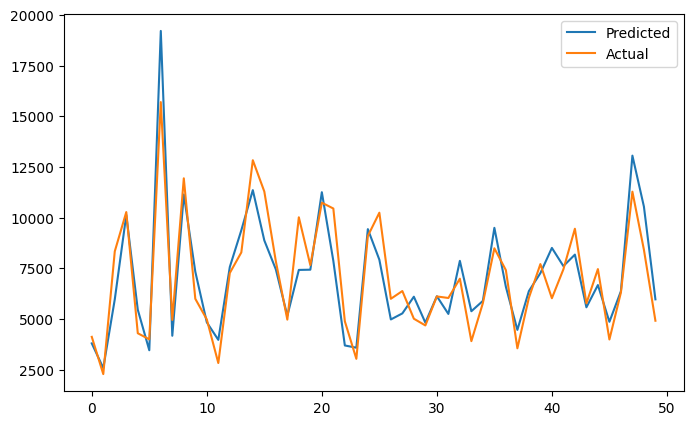

In [208]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **LASSO - LARS Regression**

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-55,1e-40,1e-30,1e-22,1e-20,1e-15,1e-5,1e-1,1,2]}    
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train1, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\n\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


y_predicted = lasso_regressor.predict(x_train1)
y_test_predicted = lasso_regressor.predict(x_test1)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

The best fit alpha value is found out to be : {'alpha': 1e-55}


Using  {'alpha': 1e-55}  the negative mean squared error is:  -41.74524511510177
Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903


Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


In [191]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=1e-55) #fit_intercept= True, normalize=True)
lasreg = las.fit(x_train1, y_train)
print("Regresion Model Score" , ":" , lasreg.score(x_train1, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , lasreg.score(x_test1, y_test))
print("\n")
yd_predicted = lasreg.predict(x_train1)
yd_test_predicted = lasreg.predict(x_test1)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8632790801198456 
 Out of Sample Test Score : 0.8620839187158411


Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903


Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


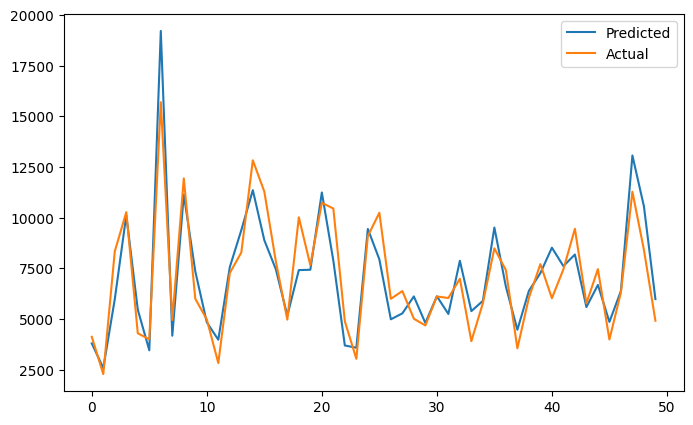

In [192]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

**Hyperparameter Tuning using GridSearchCV**

# **RIDGE Regression**

In [193]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(x_train1, y_train)

# validation
print("Regresion Model Score" , ":" , rdgreg.score(x_train1, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , rdgreg.score(x_test1, y_test))
print('\n')
yd_predicted = rdgreg.predict(x_train1)
yd_test_predicted = rdgreg.predict(x_test1)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8632790800960524 
 Out of Sample Test Score : 0.8620839324953599


Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903


Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


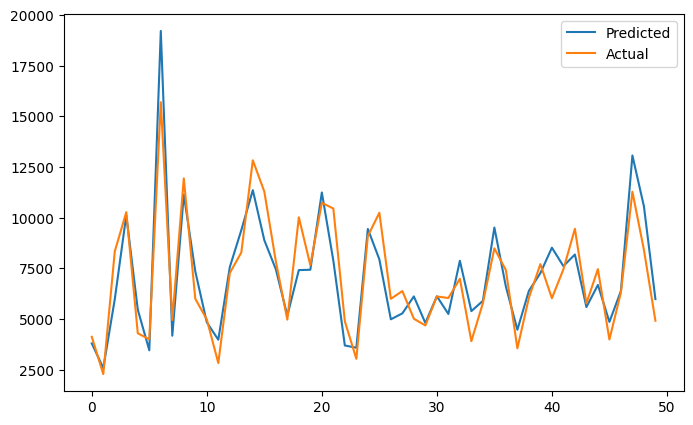

In [194]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **Decision Tree**

In [195]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(x_train1, y_train)
print("Regresion Model Score" , ":" , treereg.score(x_train1, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , treereg.score(x_test1, y_test))
print("\n")
yl_predicted = treereg.predict(x_train1)
yl_test_predicted = treereg.predict(x_test1)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9637035071087259 
 Out of Sample Test Score : 0.9549962826957075


Training RMSE : 6.460772229949226 
Testing RMSE : 6.474646603676903


Training MAPE : 6.240653544026185 
Testing MAPE : 6.265303166288976


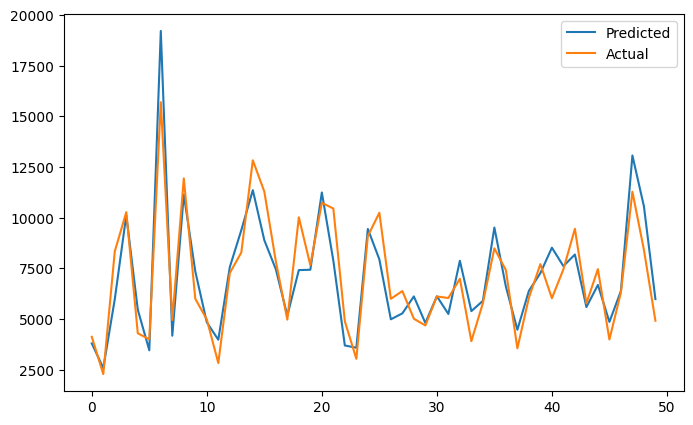

In [196]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

# **Random Forest**

In [197]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(x_train1, y_train)
print("Regresion Model Score" , ":" , rdfreg.score(x_train1, y_train) , "\n" ,
      "Out of Sample Test Score" ,":" , rdfreg.score(x_test1, y_test))   
print("\n")
y_predicted = rdfreg.predict(x_train1)
y_test_predicted = rdfreg.predict(x_test1)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "\nTesting RMSE", ":", rmse(y_test, y_test_predicted))
print("\n")
print("Training MAPE", ":", mape(y_train, y_predicted),
      "\nTesting MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9954850335729059 
 Out of Sample Test Score : 0.9722091347262806


Training RMSE : 1.1740705847395725 
Testing RMSE : 2.9064285367040177


Training MAPE : 1.0353113564087504 
Testing MAPE : 2.6324791190241545


In [204]:
from sklearn.metrics import r2_score

In [205]:
r2 = r2_score( y_train, y_predicted)
print('r2 score for a model which predicts mean value always is', r2)

r2 score for a model which predicts mean value always is 0.9954850335729059


**Feature importance as per Random Forest** 

Text(0.5, 0, 'Relative Importance')

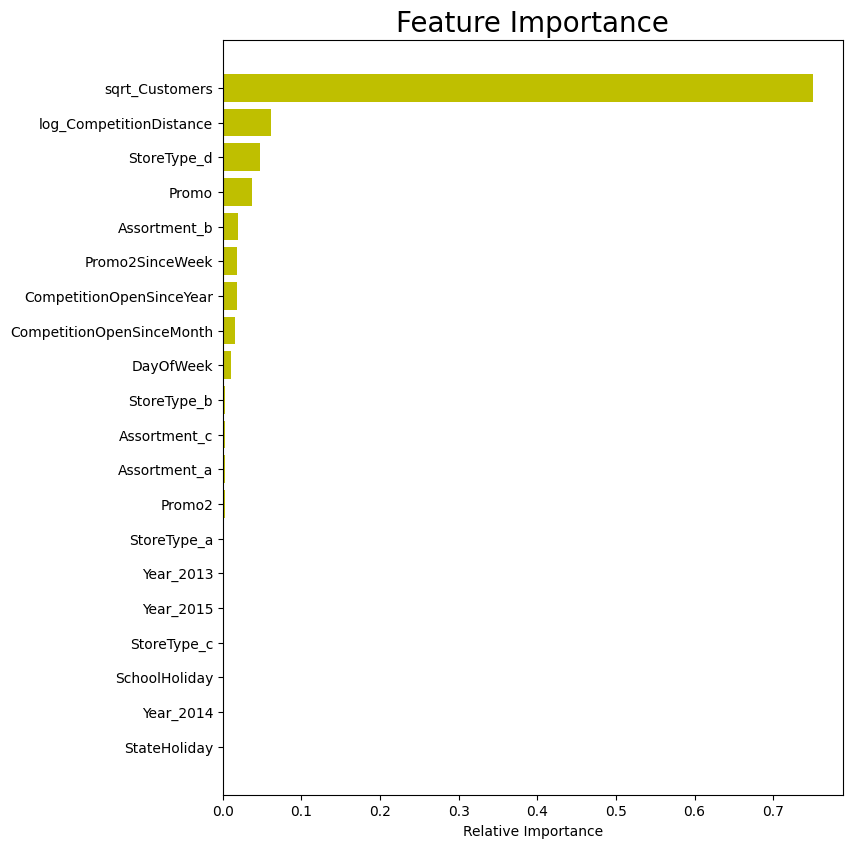

In [198]:
features = x_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importance', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# **Final Sales Prediction**

In [199]:
#constructing a prediction dataframe with the actual and predicted sales values.
prediction_df = pd.DataFrame(np.array((y_test)**2), columns = ["y_test"])
prediction_df["y_test_predicted"] = np.array((y_test_predicted)**2)
prediction_df.head(20)

,y_test,y_test_predicted
0,4116.0,3921.069536
1,2277.0,2342.889952
2,8336.0,8160.315862
3,10274.0,10029.143688
4,4294.0,4973.100640
5,3993.0,3959.286713
6,15700.0,16008.265856
7,4951.0,5205.967812
8,11939.0,12129.621967
9,5994.0,6428.079588


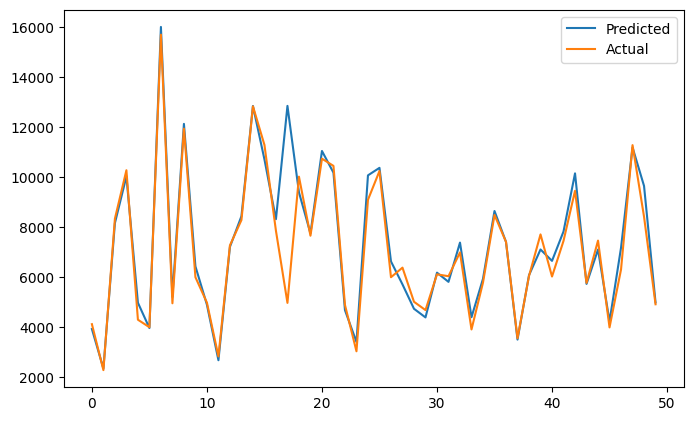

In [200]:
#plotting the the actual and predicted sales values
plt.figure(figsize=(8,5))
plt.plot((y_test_predicted[:50])**2)
plt.plot(np.array((y_test[:50])**2))
plt.legend(["Predicted","Actual"])
plt.show()

***Conclusion: With 99% Training Accuracy and 97% Testing Accuracy, Random Forest has proven to be the most efficient model out of the algorithms used in our model, including Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, and Random Forest.***